In [1]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
from sklearn.model_selection import train_test_split
warnings.filterwarnings('ignore')

from sklearn.ensemble import RandomForestClassifier

In [2]:
df = pd.read_csv("waterQuality1.csv")

In [3]:
df

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
0,1.65,9.08,0.04,2.85,0.007,0.35,0.83,0.17,0.05,0.20,...,0.054,16.08,1.13,0.007,37.75,6.78,0.08,0.34,0.02,1
1,2.32,21.16,0.01,3.31,0.002,5.28,0.68,0.66,0.90,0.65,...,0.100,2.01,1.93,0.003,32.26,3.21,0.08,0.27,0.05,1
2,1.01,14.02,0.04,0.58,0.008,4.24,0.53,0.02,0.99,0.05,...,0.078,14.16,1.11,0.006,50.28,7.07,0.07,0.44,0.01,0
3,1.36,11.33,0.04,2.96,0.001,7.23,0.03,1.66,1.08,0.71,...,0.016,1.41,1.29,0.004,9.12,1.72,0.02,0.45,0.05,1
4,0.92,24.33,0.03,0.20,0.006,2.67,0.69,0.57,0.61,0.13,...,0.117,6.74,1.11,0.003,16.90,2.41,0.02,0.06,0.02,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7994,0.05,7.78,0.00,1.95,0.040,0.10,0.03,0.03,1.37,0.00,...,0.197,14.29,1.00,0.005,3.57,2.13,0.09,0.06,0.03,1
7995,0.05,24.22,0.02,0.59,0.010,0.45,0.02,0.02,1.48,0.00,...,0.031,10.27,1.00,0.001,1.48,1.11,0.09,0.10,0.08,1
7996,0.09,6.85,0.00,0.61,0.030,0.05,0.05,0.02,0.91,0.00,...,0.182,15.92,1.00,0.000,1.35,4.84,0.00,0.04,0.05,1
7997,0.01,10,0.01,2.00,0.000,2.00,0.00,0.09,0.00,0.00,...,0.000,0.00,0.00,0.000,0.00,0.00,0.00,0.00,0.00,1


In [4]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [5]:
df.describe()

,aluminium,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,viruses,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium
count,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000,7999.000000
mean,0.666158,0.161445,1.567715,0.042806,2.176831,0.247226,0.805857,0.771565,0.319665,0.328583,0.099450,9.818822,1.329961,0.005194,16.460299,2.920548,0.049685,0.147781,0.044673
std,1.265145,0.252590,1.216091,0.036049,2.567027,0.270640,0.653539,0.435373,0.329485,0.378096,0.058172,5.541331,0.573219,0.002967,17.687474,2.323009,0.028770,0.143551,0.026904
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.040000,0.030000,0.560000,0.008000,0.100000,0.050000,0.090000,0.405000,0.000000,0.002000,0.048000,5.000000,1.000000,0.003000,2.170000,0.820000,0.020000,0.040000,0.020000
50%,0.070000,0.050000,1.190000,0.040000,0.530000,0.090000,0.750000,0.770000,0.220000,0.008000,0.102000,9.930000,1.420000,0.005000,7.740000,2.410000,0.050000,0.080000,0.050000
75%,0.280000,0.100000,2.480000,0.070000,4.240000,0.440000,1.390000,1.160000,0.610000,0.700000,0.151000,14.610000,1.760000,0.008000,29.480000,4.670000,0.070000,0.240000,0.070000
max,5.050000,1.050000,4.940000,0.130000,8.680000,0.900000,2.000000,1.500000,1.000000,1.000000,0.200000,19.830000,2.930000,0.010000,60.010000,7.990000,0.100000,0.500000,0.090000


In [6]:
df.duplicated().sum()

0

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7999 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7999 non-null   float64
 1   ammonia      7999 non-null   object 
 2   arsenic      7999 non-null   float64
 3   barium       7999 non-null   float64
 4   cadmium      7999 non-null   float64
 5   chloramine   7999 non-null   float64
 6   chromium     7999 non-null   float64
 7   copper       7999 non-null   float64
 8   flouride     7999 non-null   float64
 9   bacteria     7999 non-null   float64
 10  viruses      7999 non-null   float64
 11  lead         7999 non-null   float64
 12  nitrates     7999 non-null   float64
 13  nitrites     7999 non-null   float64
 14  mercury      7999 non-null   float64
 15  perchlorate  7999 non-null   float64
 16  radium       7999 non-null   float64
 17  selenium     7999 non-null   float64
 18  silver       7999 non-null   float64
 19  uraniu

In [8]:
df[df['ammonia']=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
7551,0.03,#NUM!,0.08,0.79,0.07,0.08,0.05,0.58,0.34,0.00,...,0.183,4.37,1.43,0.007,0.62,2.54,0.07,0.05,0.05,#NUM!
7568,0.06,#NUM!,0.07,1.72,0.08,0.32,0.01,1.11,0.61,0.00,...,0.178,12.10,2.03,0.008,1.37,2.05,0.06,0.10,0.07,#NUM!
7890,0.01,#NUM!,0.08,0.49,0.00,0.07,0.09,0.06,0.72,0.57,...,0.088,9.57,1.45,0.009,7.67,7.70,0.03,0.05,0.02,#NUM!


In [9]:
df = df[df['ammonia'] !='#NUM!']

In [10]:
df[df['ammonia']=='#NUM!']

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe


In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 7996 entries, 0 to 7998
Data columns (total 21 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   aluminium    7996 non-null   float64
 1   ammonia      7996 non-null   object 
 2   arsenic      7996 non-null   float64
 3   barium       7996 non-null   float64
 4   cadmium      7996 non-null   float64
 5   chloramine   7996 non-null   float64
 6   chromium     7996 non-null   float64
 7   copper       7996 non-null   float64
 8   flouride     7996 non-null   float64
 9   bacteria     7996 non-null   float64
 10  viruses      7996 non-null   float64
 11  lead         7996 non-null   float64
 12  nitrates     7996 non-null   float64
 13  nitrites     7996 non-null   float64
 14  mercury      7996 non-null   float64
 15  perchlorate  7996 non-null   float64
 16  radium       7996 non-null   float64
 17  selenium     7996 non-null   float64
 18  silver       7996 non-null   float64
 19  uranium    

In [12]:
df.isnull().sum()

aluminium      0
ammonia        0
arsenic        0
barium         0
cadmium        0
chloramine     0
chromium       0
copper         0
flouride       0
bacteria       0
viruses        0
lead           0
nitrates       0
nitrites       0
mercury        0
perchlorate    0
radium         0
selenium       0
silver         0
uranium        0
is_safe        0
dtype: int64

In [13]:
df['ammonia'] = pd.to_numeric(df['ammonia'])
df['is_safe'] = pd.to_numeric(df['is_safe'])

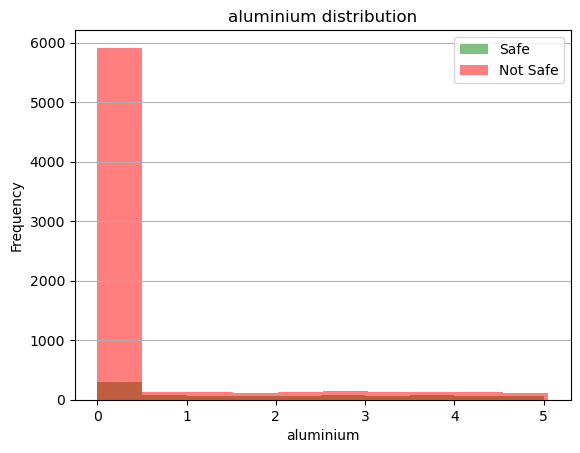

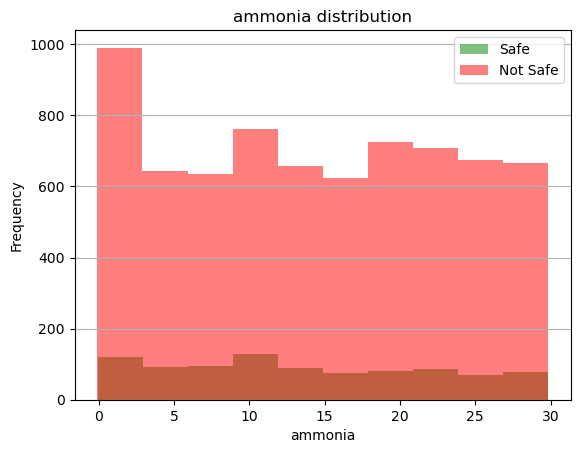

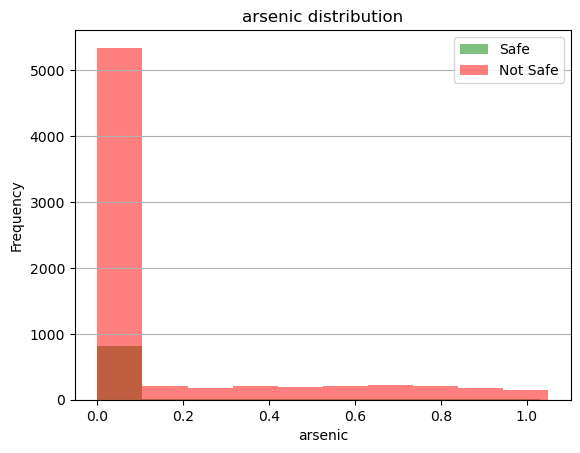

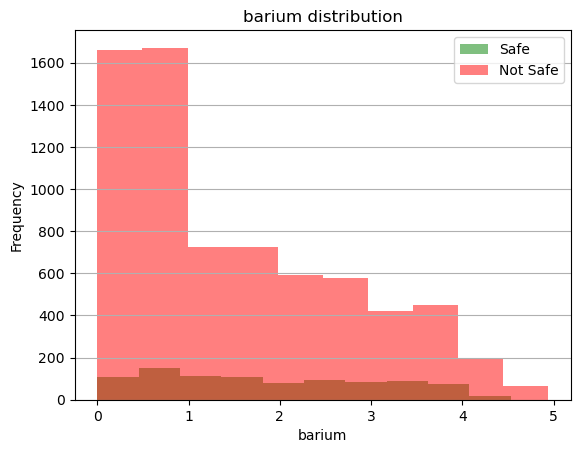

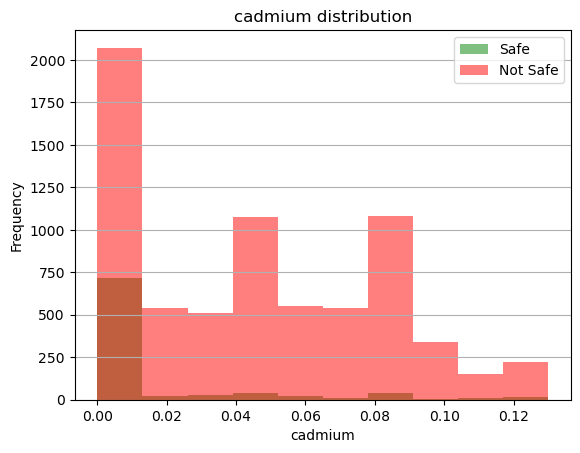

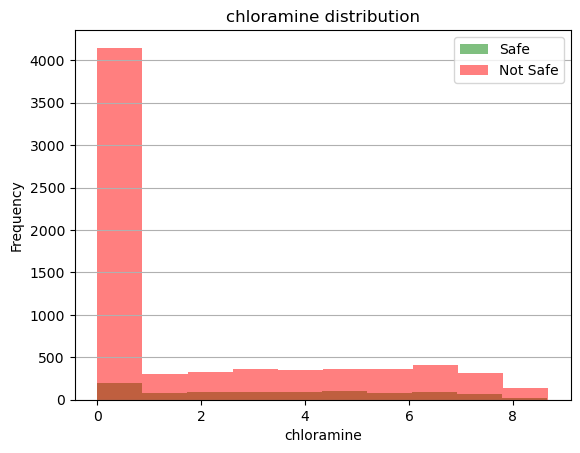

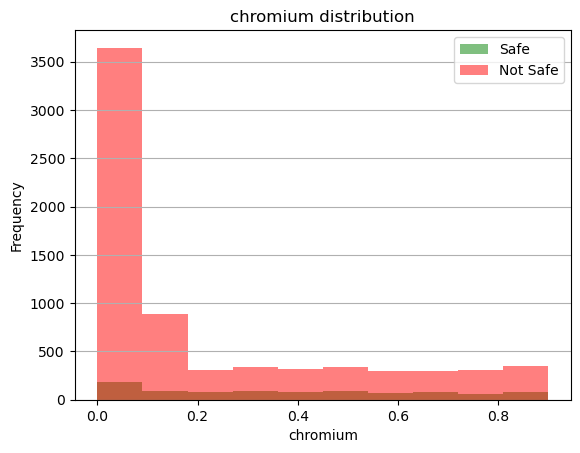

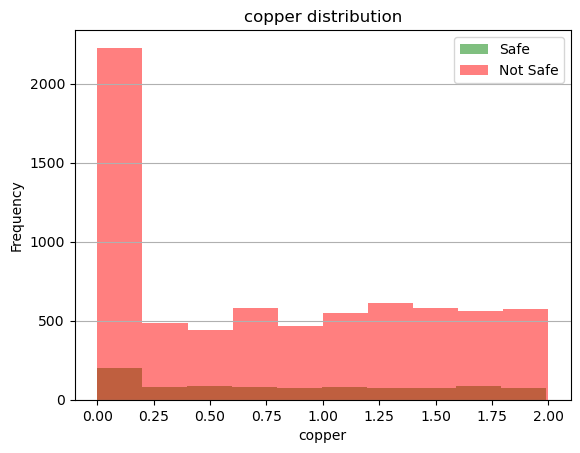

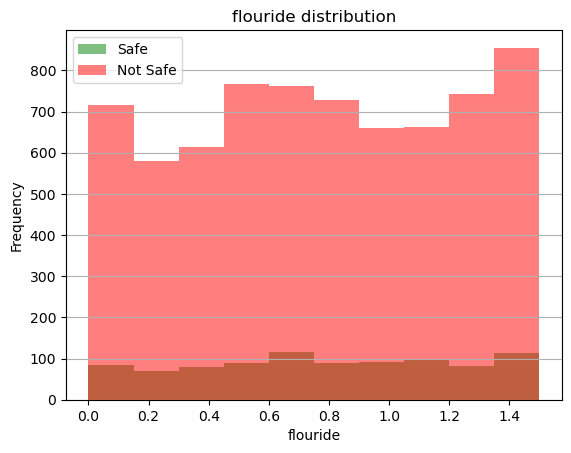

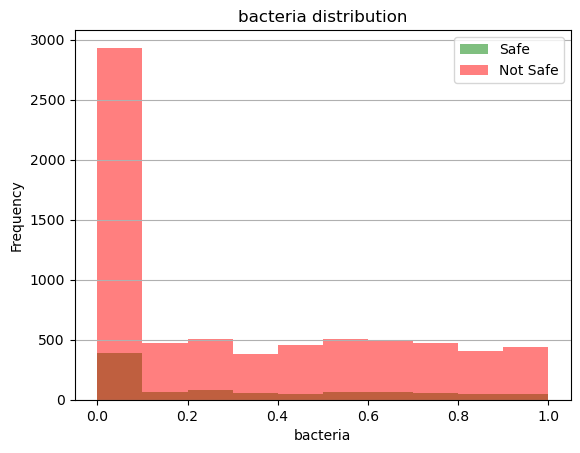

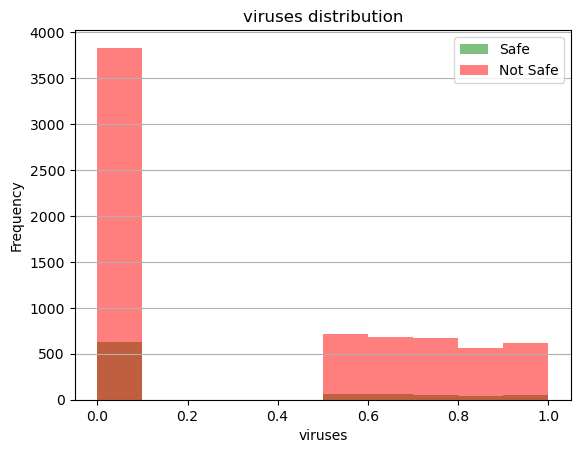

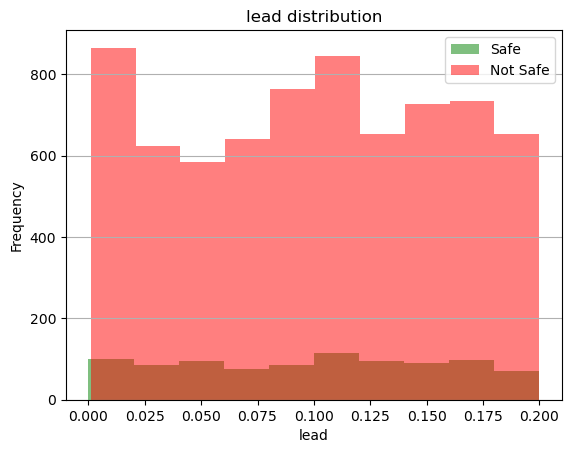

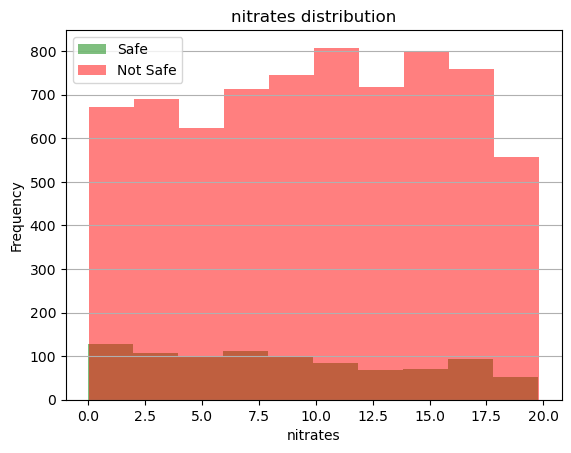

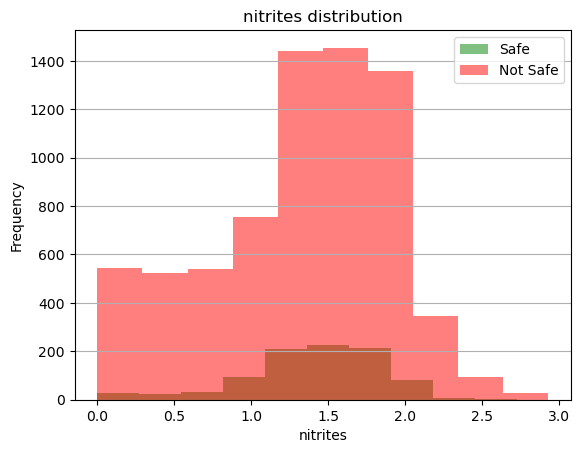

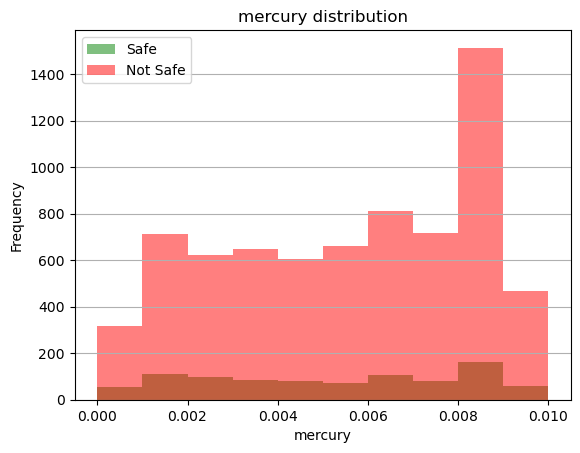

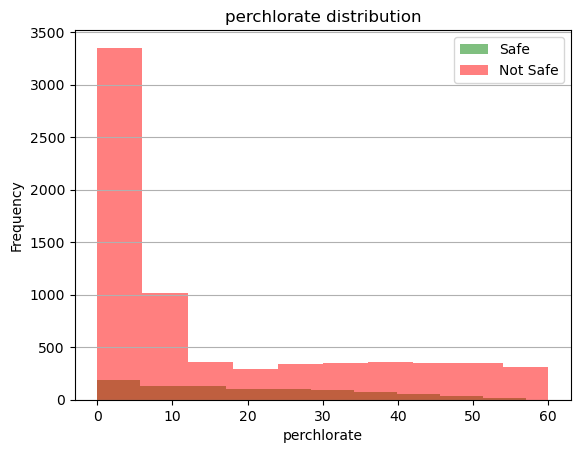

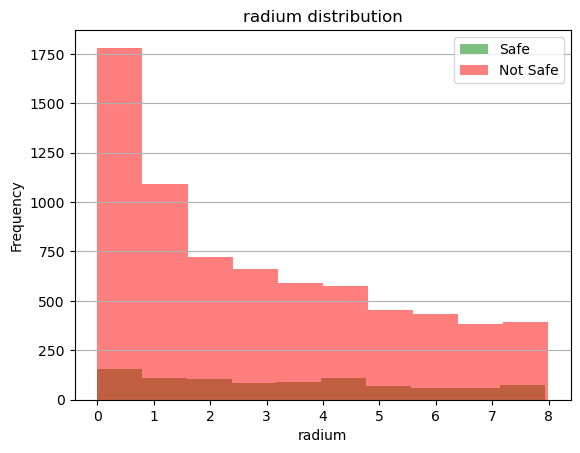

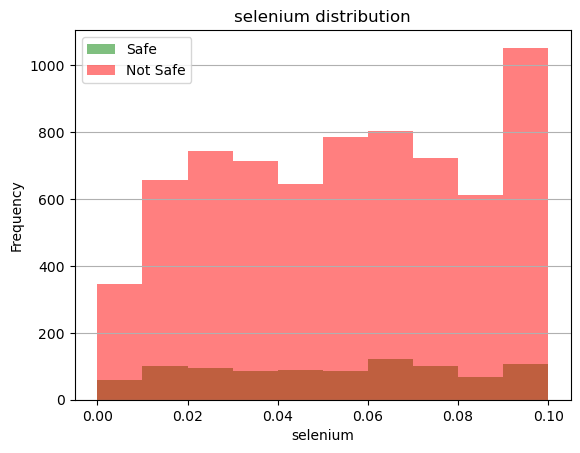

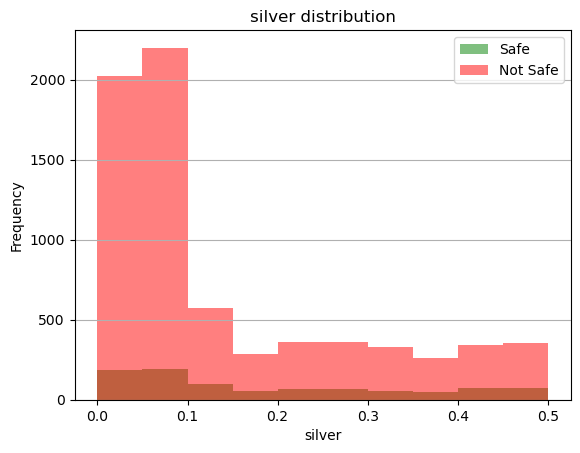

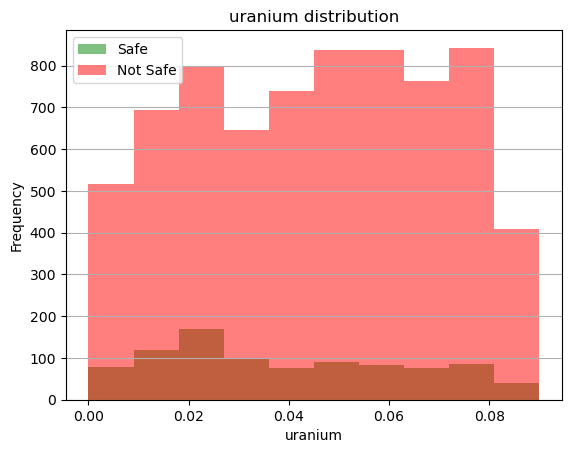

In [14]:
for i in df.columns[:-1]:
    plt.hist(df[df['is_safe']==1][i],color = 'green', alpha =0.5,label= 'Safe')
    plt.hist(df[df['is_safe']==0][i],color = 'red', alpha = 0.5, label = 'Not Safe')
    plt.grid(axis='y')
    plt.xlabel(i)
    plt.ylabel('Frequency')
    plt.title(i + ' distribution')
    plt.legend()
    plt.show()

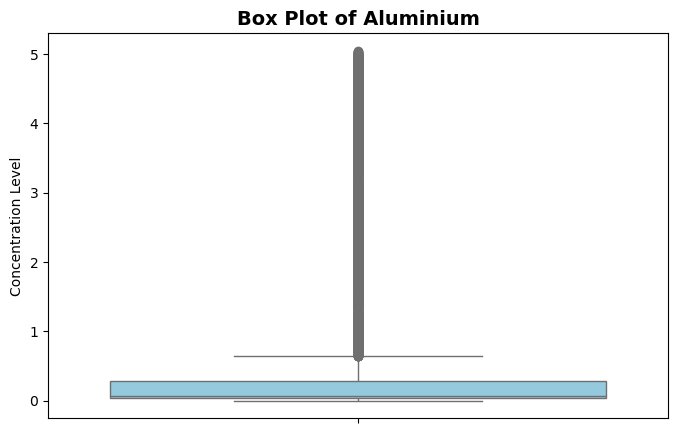

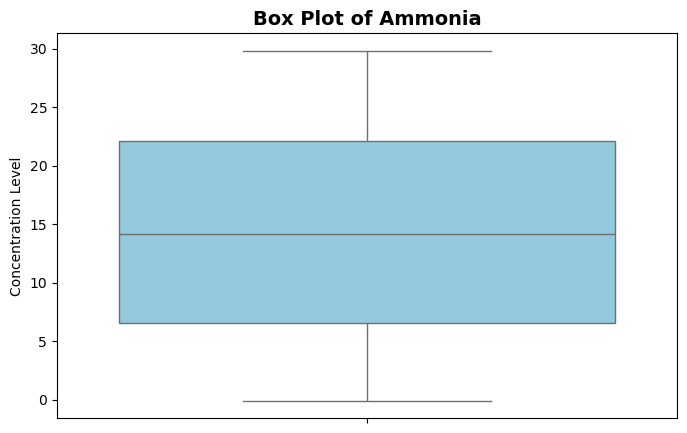

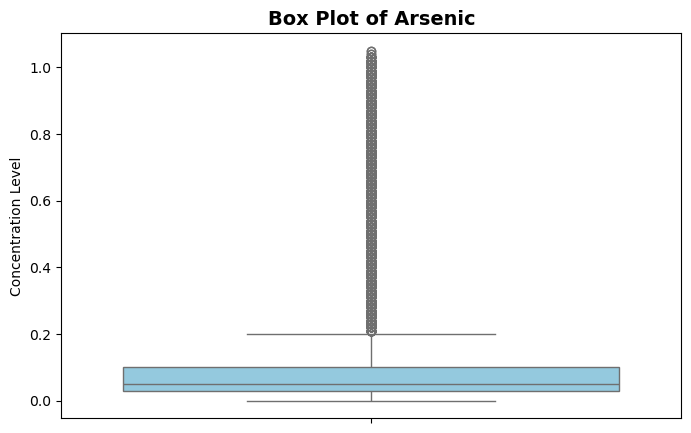

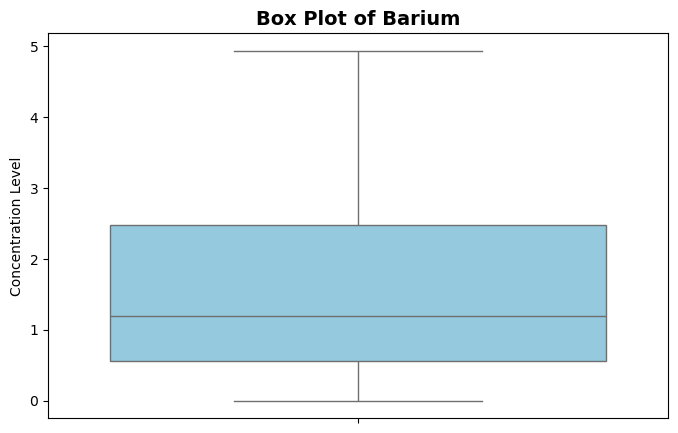

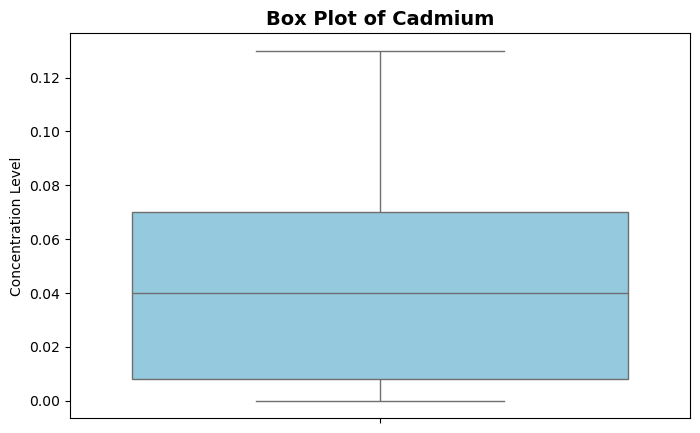

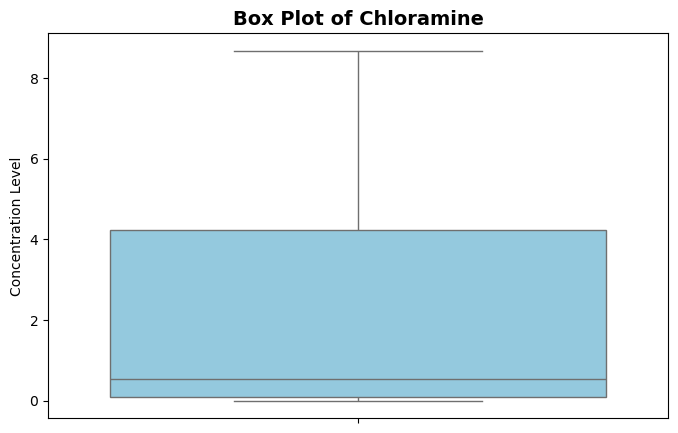

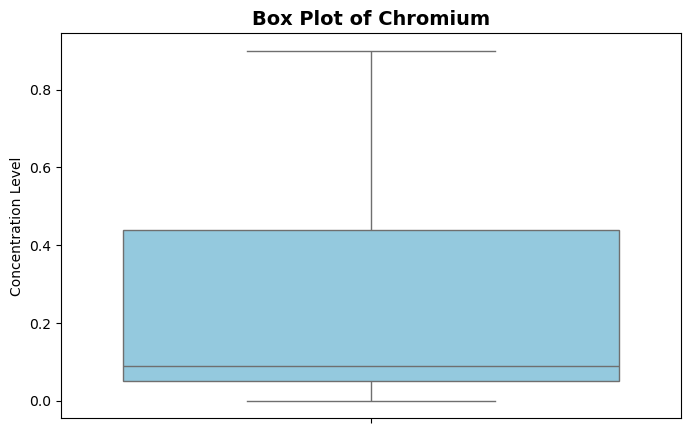

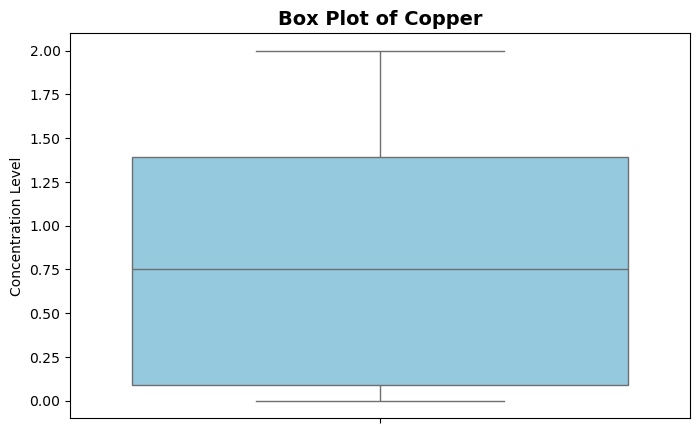

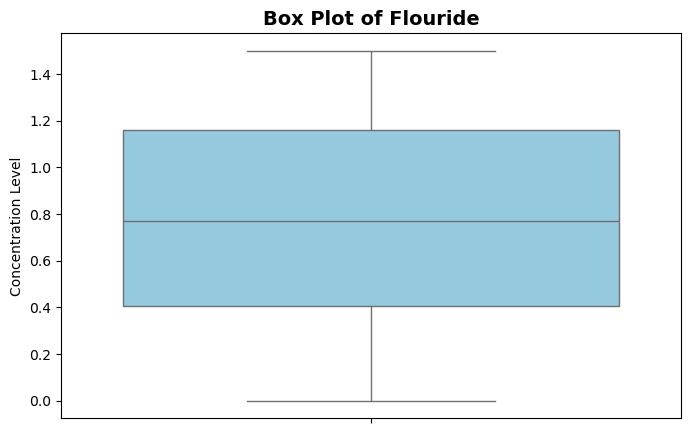

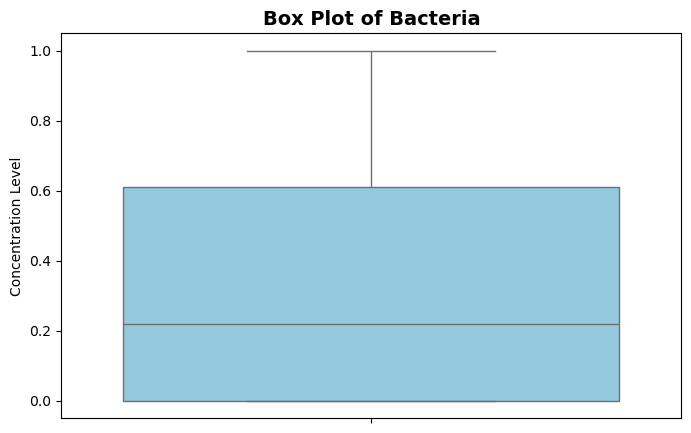

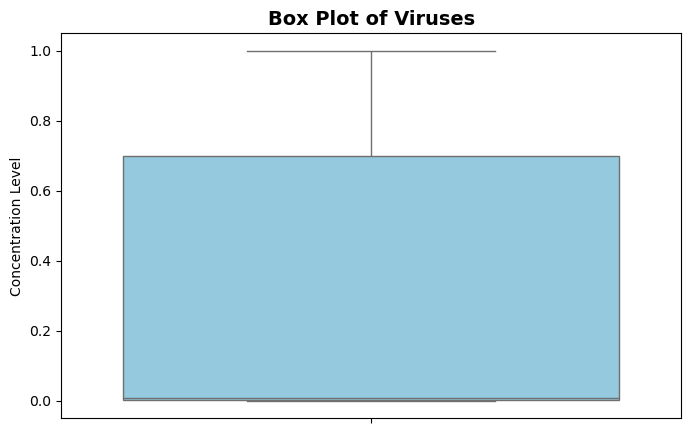

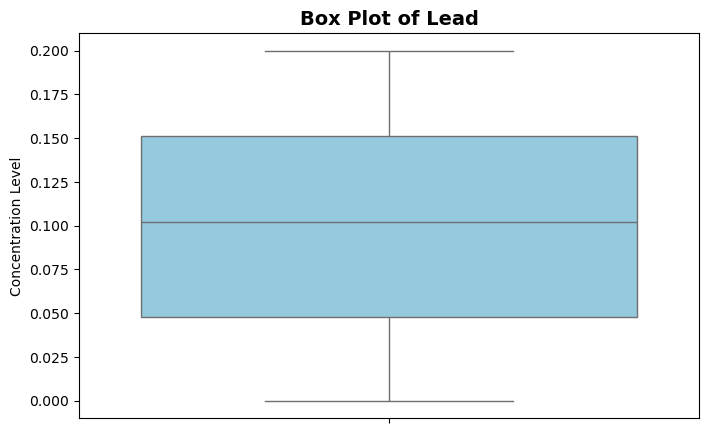

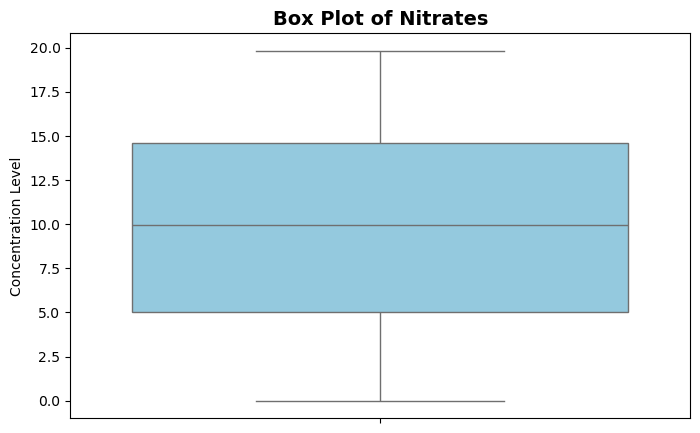

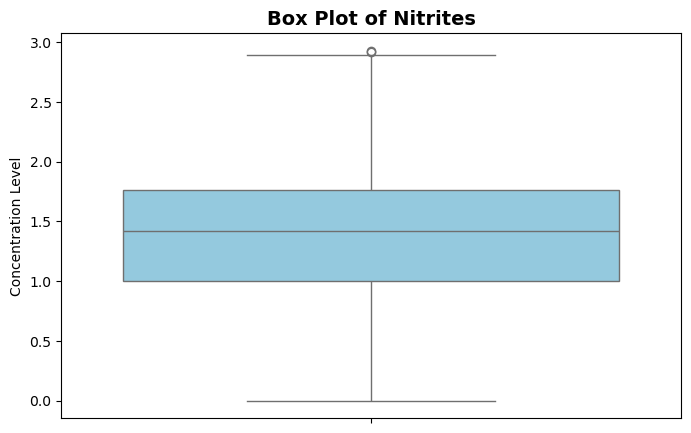

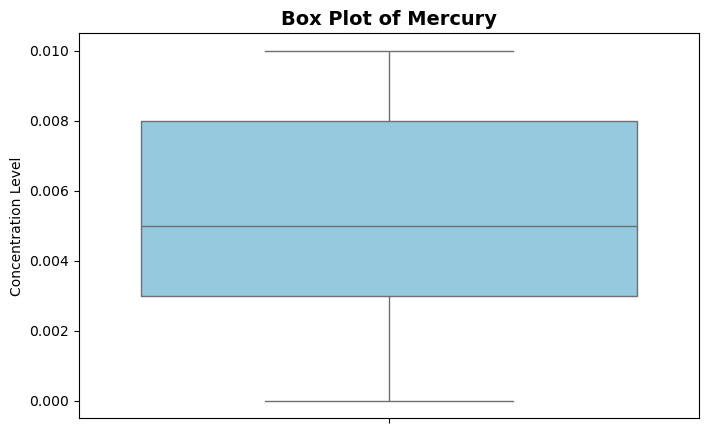

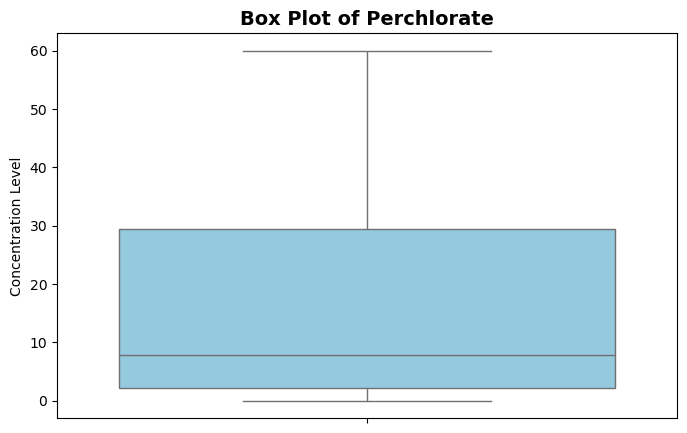

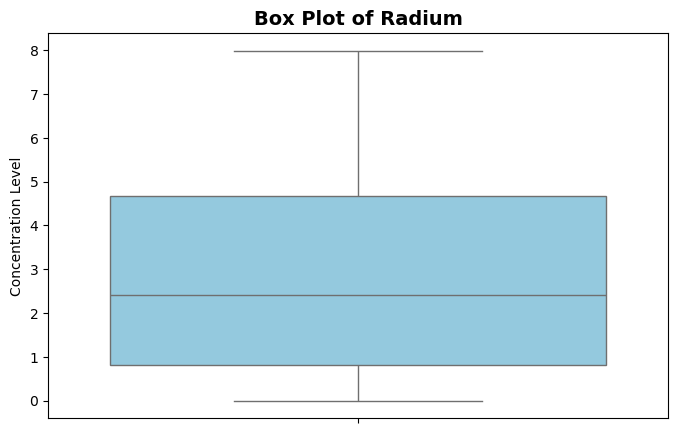

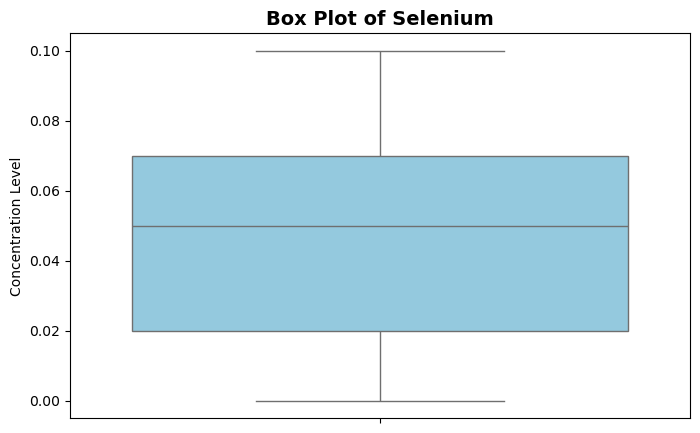

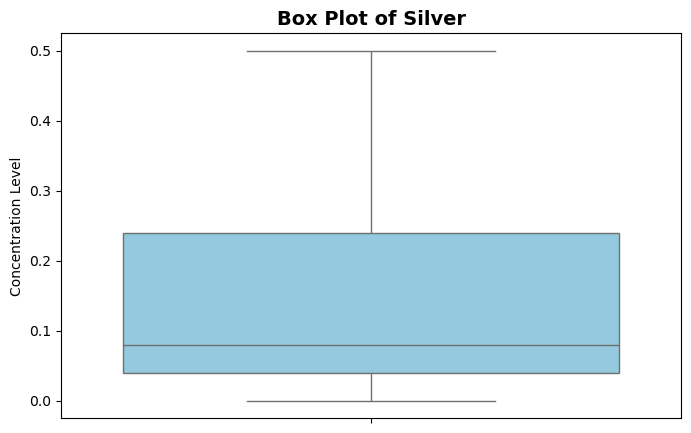

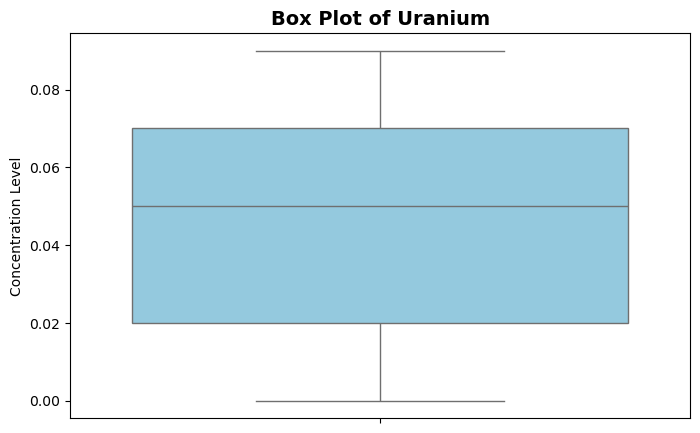

In [15]:
contaminants=['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium']
for col in contaminants:
    plt.figure(figsize=(8,5))
    sns.boxplot(y=df[col], color="skyblue")
    plt.title(f"Box Plot of {col.capitalize()}", fontsize=14, fontweight="bold")
    plt.ylabel("Concentration Level")
    plt.show()

In [16]:
q1 = df['aluminium'].quantile(0.25)
q3 = df['aluminium'].quantile(0.75)

In [17]:
IQR = q3-q1

In [18]:
min_range = q1-(1.5*IQR)
max_range =q3+(1.5*IQR)
min_range,max_range

(-0.32000000000000006, 0.6400000000000001)

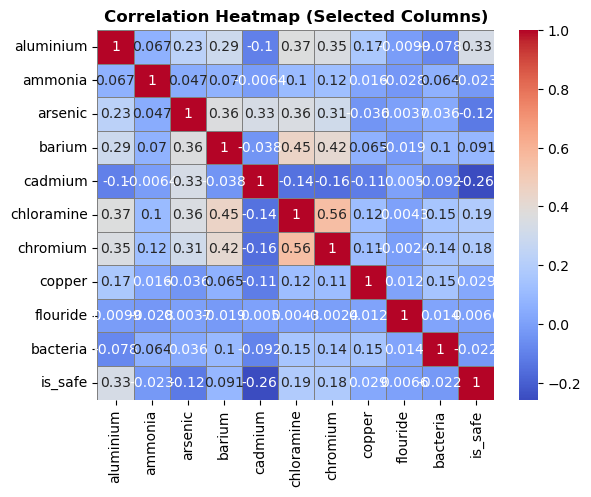

In [19]:
selected_columns = ['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine','chromium', 'copper', 'flouride','bacteria','is_safe']

corr = df[selected_columns].corr()

sns.heatmap(corr, annot = True, cmap="coolwarm",linewidths=0.5,linecolor='gray')
plt.title("Correlation Heatmap (Selected Columns)",fontweight='bold')
plt.show()

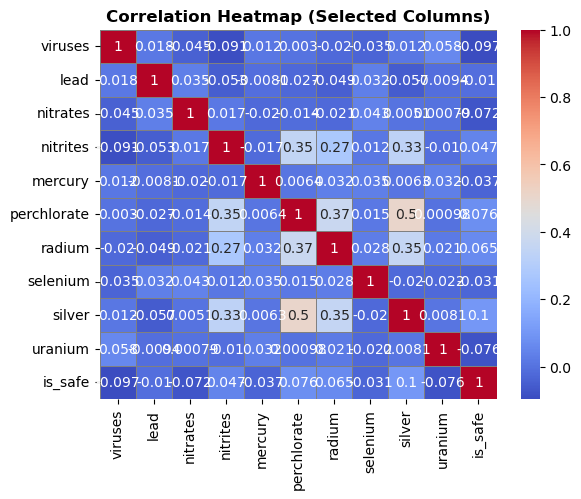

In [20]:
selected_columns = ['viruses', 'lead', 'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium','silver', 'uranium','is_safe']

corr = df[selected_columns].corr()

sns.heatmap(corr, annot = True, cmap="coolwarm",linewidths=0.5,linecolor='gray')
plt.title("Correlation Heatmap (Selected Columns)",fontweight='bold')
plt.show()

In [21]:
df.columns

Index(['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine',
       'chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium',
       'silver', 'uranium', 'is_safe'],
      dtype='object')

In [22]:
corr = df.corr()
corr

,aluminium,ammonia,arsenic,barium,cadmium,chloramine,chromium,copper,flouride,bacteria,...,lead,nitrates,nitrites,mercury,perchlorate,radium,selenium,silver,uranium,is_safe
aluminium,1.000000,0.067369,0.225725,0.294091,-0.099902,0.369221,0.353134,0.168569,-0.009877,-0.078324,...,0.020957,-0.003851,0.237439,-0.003129,0.362986,0.243396,-0.003651,0.334923,0.014723,0.333974
ammonia,0.067369,1.000000,0.046783,0.070099,-0.006422,0.104775,0.124782,0.015953,-0.028221,0.063603,...,-0.037065,0.006483,-0.063309,0.020884,0.090928,0.050401,0.029897,0.075547,0.014635,-0.022919
arsenic,0.225725,0.046783,1.000000,0.362925,0.334782,0.356509,0.312421,-0.036488,0.003731,0.035642,...,-0.087669,0.027533,0.305113,-0.015288,0.332228,0.218328,-0.006993,0.307794,0.001469,-0.123362
barium,0.294091,0.070099,0.362925,1.000000,-0.037901,0.446869,0.415937,0.065277,-0.018637,0.101304,...,-0.042829,-0.011423,0.312783,0.006165,0.462207,0.286890,0.035222,0.431542,-0.002541,0.090858
cadmium,-0.099902,-0.006422,0.334782,-0.037901,1.000000,-0.144366,-0.157716,-0.109252,0.005005,-0.092133,...,-0.035313,0.020232,-0.015829,-0.016169,-0.149269,-0.098936,0.009933,-0.155441,-0.005911,-0.256034
chloramine,0.369221,0.104775,0.356509,0.446869,-0.144366,1.000000,0.555846,0.118975,0.004254,0.154443,...,-0.030241,-0.001619,0.379916,-0.021198,0.588683,0.389119,0.011435,0.522372,-0.007648,0.186704
chromium,0.353134,0.124782,0.312421,0.415937,-0.157716,0.555846,1.000000,0.113003,-0.002424,0.141937,...,-0.050254,-0.012843,0.335940,-0.022541,0.524432,0.315484,0.030598,0.510705,-0.005472,0.182306
copper,0.168569,0.015953,-0.036488,0.065277,-0.109252,0.118975,0.113003,1.000000,0.011647,0.149271,...,0.121762,0.002259,0.162092,0.017785,0.104527,0.026534,-0.003356,0.089241,0.006802,0.029498
flouride,-0.009877,-0.028221,0.003731,-0.018637,0.005005,0.004254,-0.002424,0.011647,1.000000,0.013984,...,0.012146,-0.008245,-0.016591,-0.004263,-0.016352,0.007683,0.022726,0.014446,0.016849,0.006550
bacteria,-0.078324,0.063603,0.035642,0.101304,-0.092133,0.154443,0.141937,0.149271,0.013984,1.000000,...,-0.027179,-0.033993,0.246463,-0.004406,0.147526,0.099080,-0.006779,0.148199,0.045077,-0.022077


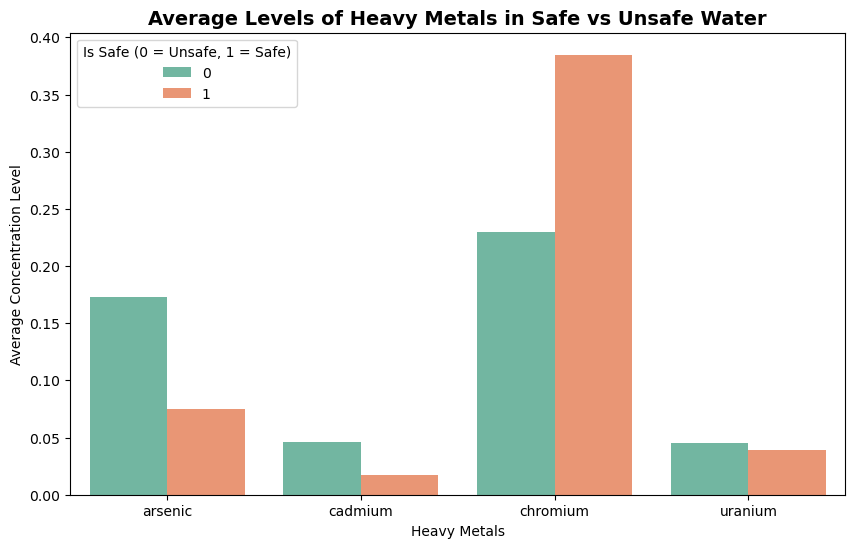

In [23]:
heavy_metals = ['arsenic', 'cadmium', 'chromium', 'uranium']

metal_stats = df.groupby('is_safe')[heavy_metals].mean().reset_index()

metal_stats_melted = metal_stats.melt(id_vars='is_safe', var_name='Metal',  value_name='Average Level')

plt.figure(figsize=(10,6))
sns.barplot(x='Metal', y='Average Level', hue='is_safe', data=metal_stats_melted, palette='Set2')

plt.title("Average Levels of Heavy Metals in Safe vs Unsafe Water", fontsize=14, fontweight="bold")
plt.xlabel("Heavy Metals")
plt.ylabel("Average Concentration Level")
plt.legend(title="Is Safe (0 = Unsafe, 1 = Safe)")
plt.show()

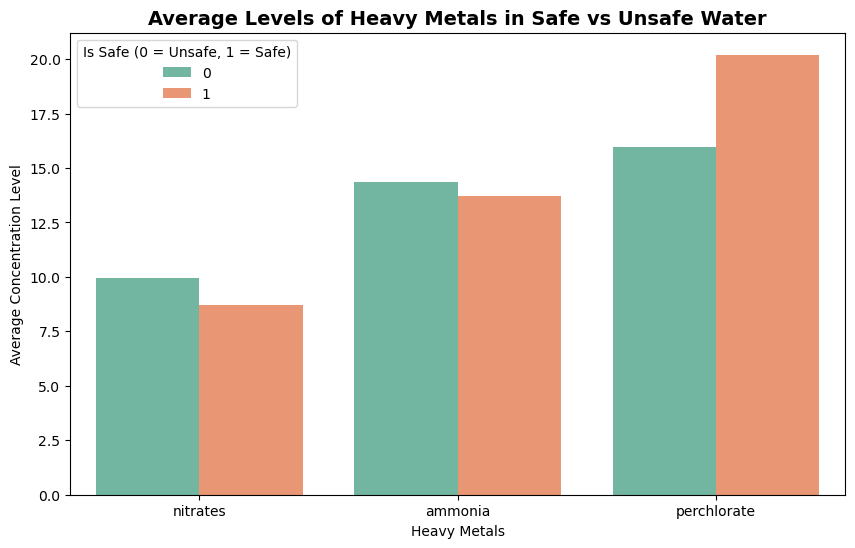

In [24]:
heavy_metals = ['nitrates', 'ammonia', 'perchlorate']

metal_stats = df.groupby('is_safe')[heavy_metals].mean().reset_index()

metal_stats_melted = metal_stats.melt(id_vars='is_safe', var_name='Metal',  value_name='Average Level')

plt.figure(figsize=(10,6))
sns.barplot(x='Metal', y='Average Level', hue='is_safe', data=metal_stats_melted, palette='Set2')

plt.title("Average Levels of Heavy Metals in Safe vs Unsafe Water", fontsize=14, fontweight="bold")
plt.xlabel("Heavy Metals")
plt.ylabel("Average Concentration Level")
plt.legend(title="Is Safe (0 = Unsafe, 1 = Safe)")
plt.show()

In [25]:
contaminants = df.drop(columns=['is_safe'])
unsafe_means = df[df['is_safe'] == 0][contaminants.columns].mean().sort_values(ascending=False)

In [26]:
top_5= unsafe_means.head(5)
top_5

perchlorate    15.984616
ammonia        14.351222
nitrates        9.962612
radium          2.866150
chloramine      2.005621
dtype: float64

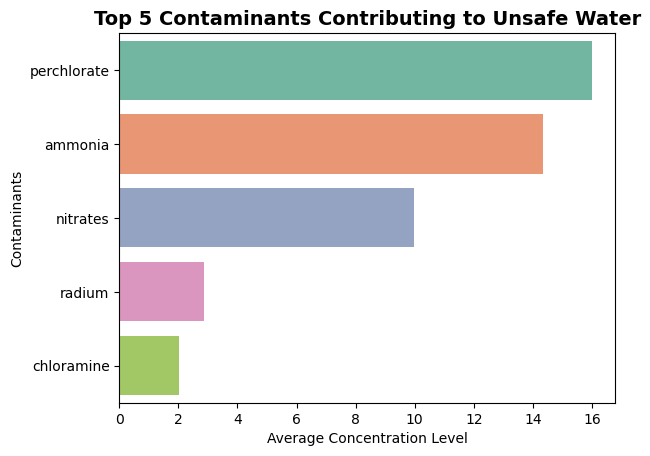

In [27]:
sns.barplot(x=top_5.values,y=top_5.index,palette='Set2')
plt.title("Top 5 Contaminants Contributing to Unsafe Water", fontsize=14, fontweight="bold")
plt.xlabel("Average Concentration Level")
plt.ylabel("Contaminants")
plt.show()

In [28]:
contaminants = df.drop(columns=['is_safe'])
safe_means = df[df['is_safe'] == 1][contaminants.columns].mean().sort_values(ascending=False)

In [29]:
safe_top_5=safe_means.head(5)
safe_top_5

perchlorate    20.198739
ammonia        13.711096
nitrates        8.705680
chloramine      3.513355
radium          3.339211
dtype: float64

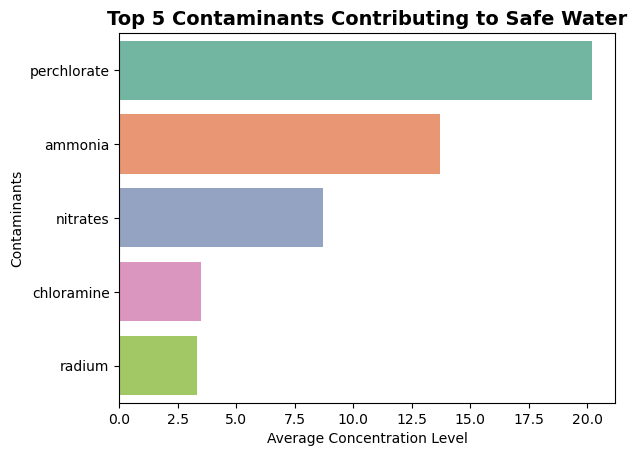

In [30]:
sns.barplot(x=safe_top_5.values,y=safe_top_5.index,palette='Set2')
plt.title("Top 5 Contaminants Contributing to Safe Water", fontsize=14, fontweight="bold")
plt.xlabel("Average Concentration Level")
plt.ylabel("Contaminants")
plt.show()

In [32]:
x = df[['aluminium', 'ammonia', 'arsenic', 'barium', 'cadmium', 'chloramine','chromium', 'copper', 'flouride', 'bacteria', 'viruses', 'lead',
       'nitrates', 'nitrites', 'mercury', 'perchlorate', 'radium', 'selenium','silver', 'uranium']]
y = df['is_safe']

In [33]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
x_res, y_res = smote.fit_resample(x, y)

In [34]:
x_train,x_test,y_train,y_test = train_test_split(x_res,y_res,test_size=0.2,random_state=42)

In [35]:
classifier = RandomForestClassifier()
classifier.fit(x_train,y_train)

RandomForestClassifier()

In [36]:
y_pred = classifier.predict(x_test)

In [37]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1420
           1       0.97      0.99      0.98      1414

    accuracy                           0.98      2834
   macro avg       0.98      0.98      0.98      2834
weighted avg       0.98      0.98      0.98      2834

